In [7]:
import pandas as pd

# 데이터 경로
file_path = "C:\\Users\\wjdtn\\Downloads\\Spotify_Youtube_with_popularity.csv"

# 1. 데이터 불러오기
data = pd.read_csv(file_path)

# NaN 및 Inf 값 재확인
print("NaN 값이 포함된 열:")
print(data_cleaned.isnull().sum())

# 모든 값이 동일한 열 확인 (분산 0인 열)
constant_columns = data_cleaned.nunique()
print("상수값(모든 값이 동일)인 열:")
print(constant_columns[constant_columns == 1])

# 데이터 유형 확인
print("각 열의 데이터 유형:")
print(data_cleaned.dtypes)

# 특정 열에서 숫자가 아닌 값 확인
non_numeric = data_cleaned[~data_cleaned.applymap(lambda x: isinstance(x, (int, float))).all(1)]
print("숫자가 아닌 값이 포함된 행:")
print(non_numeric)


NaN 값이 포함된 열:
Artist                       0
Track                        0
Album                        0
Album_type                   0
Danceability                 0
Energy                       0
Key                          0
Loudness                     0
Speechiness                  0
Acousticness                 0
Instrumentalness             0
Liveness                     0
Valence                      0
Tempo                        0
Duration_ms                  0
Title                        0
Channel                      0
Views                        0
Likes                        0
Comments                     0
Licensed                     0
official_video               0
Stream                       0
Popularity_Score             0
Weighted_Popularity_Score    0
dtype: int64
상수값(모든 값이 동일)인 열:
Series([], dtype: int64)
각 열의 데이터 유형:
Artist                        object
Track                         object
Album                         object
Album_type                    o

C:\Users\wjdtn\AppData\Local\Temp\ipykernel_26152\1719567562.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = data_cleaned[~data_cleaned.applymap(lambda x: isinstance(x, (int, float))).all(1)]


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
file_path = r"C:\Users\wjdtn\Downloads\Spotify_Youtube_cleaned.csv"
data = pd.read_csv(file_path)

# 인기도 지표 선택
popularity_features = ['Views', 'Likes', 'Comments', 'Stream']

# 결측값 제거
data_cleaned = data.dropna(subset=popularity_features)

# 정규화
scaler = MinMaxScaler()
data_cleaned[popularity_features] = scaler.fit_transform(data_cleaned[popularity_features])

# 통합 점수 계산 (단순 합)
data_cleaned['Popularity_Score'] = data_cleaned[popularity_features].sum(axis=1)

# 통합 점수 계산 (가중치 합산)
weights = {'Views': 0.4, 'Likes': 0.3, 'Comments': 0.2, 'Stream': 0.1}
data_cleaned['Weighted_Popularity_Score'] = (
    data_cleaned['Views'] * weights['Views'] +
    data_cleaned['Likes'] * weights['Likes'] +
    data_cleaned['Comments'] * weights['Comments'] +
    data_cleaned['Stream'] * weights['Stream']
)

# 결과 저장
output_path = "C:\\Users\\wjdtn\\Downloads\\Spotify_Youtube_with_popularity.csv"
data_cleaned.to_csv(output_path, index=False)

print(f"인기도 점수가 추가된 데이터가 저장되었습니다: {output_path}")


인기도 점수가 추가된 데이터가 저장되었습니다: C:\Users\wjdtn\Downloads\Spotify_Youtube_with_popularity.csv


감지된 인코딩: ISO-8859-1


C:\Users\wjdtn\AppData\Local\Temp\ipykernel_26152\1466424705.py:17: DtypeWarning: Columns (25,31,32,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding=detected_encoding)


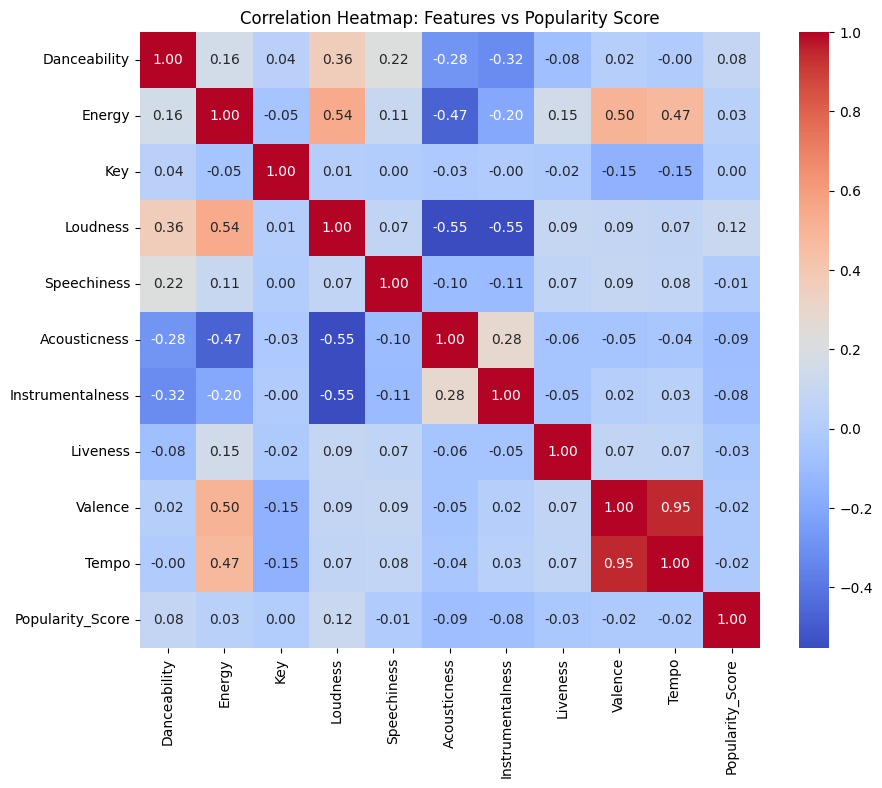

C:\Users\wjdtn\AppData\Local\Temp\ipykernel_26152\1466424705.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')


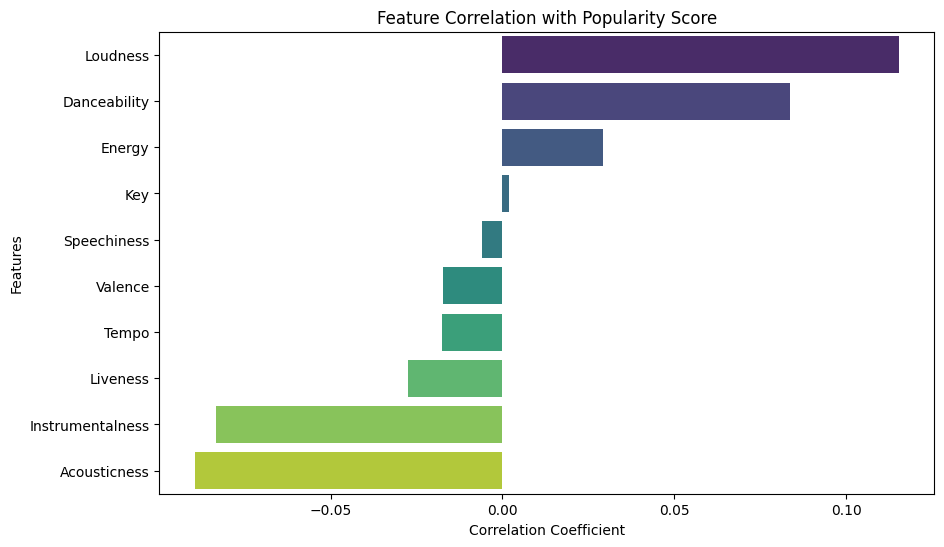

Popularity_Score와 가장 상관이 높은 특성:
        Feature  Correlation
3      Loudness     0.115433
0  Danceability     0.083686
1        Energy     0.029226


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import chardet

# 파일 경로
file_path = "C:\\Users\\wjdtn\\Downloads\\Spotify_Youtube_with_popularity.csv"

# 인코딩 감지
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read(10000))  # 파일의 처음 10,000바이트 샘플링
    detected_encoding = result['encoding']
    print(f"감지된 인코딩: {detected_encoding}")

# 데이터 불러오기
data = pd.read_csv(file_path, encoding=detected_encoding)

# 분석할 특성과 인기도 점수
features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
popularity_score = 'Popularity_Score'

# 숫자가 아닌 값이 포함된 열 확인 및 변환
for column in features + [popularity_score]:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # 숫자로 변환, 비정상 값은 NaN으로 처리

# NaN 값 제거
data_cleaned = data.dropna(subset=features + [popularity_score])

# 1. 상관관계 계산
correlations = {}
for feature in features:
    correlation, _ = pearsonr(data_cleaned[feature], data_cleaned[popularity_score])
    correlations[feature] = correlation

# 상관관계를 데이터프레임으로 정리
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# 2. 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[features + [popularity_score]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Features vs Popularity Score')
plt.show()

# 3. 상관관계 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')
plt.title('Feature Correlation with Popularity Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# 4. 상위 상관관계 특성 출력
print("Popularity_Score와 가장 상관이 높은 특성:")
print(correlation_df.head(3))
